# Visualization
Kita akan gunakan Pandas dan Matplotlib untuk membuat informasi visual dari raw data

Jenis-jenis grafik visual yang akan kita pelajari:
- membandingkan data, atau melihat trend:
  - line plot
  - area plot
  - bar chart
- pie chart - khusus untuk membandingkan data, biasanya jangan banyak-banyak (max 8 titik data)
- berbau statistik:
  - box plot
  - scatter plot
  - histogram

Case Study: Data Imigrasi ke Canada 1980-2013

Dataset: https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true

In [ ]:
# import package yang digunakan
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
# import data
excel_can = pd.ExcelFile("https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true")
excel_can.sheet_names

['Regions by Citizenship',
 'Canada by Citizenship',
 'Canada by Citizenship (2)']

In [ ]:
df_can = pd.read_excel("https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true",
                       sheet_name="Canada by Citizenship",
                       skiprows=20,
                       skipfooter=2
                       )
df_can

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59


In [ ]:
df_can.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

setelah import datanya, baiknya kita notes juga apa yang sudah kita lakukan
- skip 20 baris pertama yang tidak ada data, cuma perkenalan ini dokumen apa
- hapus 2 baris terakhir untuk negara yang tidak diketahui dan total imigran semua negara



In [ ]:
# data cleaning dan data exploration
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

195 negara, tidak ada missing value

In [ ]:
df_can.describe()

,AREA,REG,DEV,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,912.764103,1249.015385,901.753846,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,...,1190.169231,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564
std,13.082835,1185.526885,0.431878,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,...,3710.505369,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988
min,903.000000,905.000000,901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,903.000000,914.000000,902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,19.000000,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000
50%,908.000000,922.000000,902.000000,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,...,191.000000,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000
75%,922.000000,925.500000,902.000000,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,...,756.500000,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000
max,935.000000,5501.000000,902.000000,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,...,36619.000000,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000


sekilas kita bisa melihat kalau min jumlah imigran ada di 0, median rendah juga di 10, belasan lalu bertambah di tahun tahun terakhir.

tapi mau melihat informasi dari angka tabular kan susah, jadi kita gunakan grafik aja

In [ ]:
df_can_sum = df_can.describe()
df_can_sum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AREA    8 non-null      float64
 1   REG     8 non-null      float64
 2   DEV     8 non-null      float64
 3   1980    8 non-null      float64
 4   1981    8 non-null      float64
 5   1982    8 non-null      float64
 6   1983    8 non-null      float64
 7   1984    8 non-null      float64
 8   1985    8 non-null      float64
 9   1986    8 non-null      float64
 10  1987    8 non-null      float64
 11  1988    8 non-null      float64
 12  1989    8 non-null      float64
 13  1990    8 non-null      float64
 14  1991    8 non-null      float64
 15  1992    8 non-null      float64
 16  1993    8 non-null      float64
 17  1994    8 non-null      float64
 18  1995    8 non-null      float64
 19  1996    8 non-null      float64
 20  1997    8 non-null      float64
 21  1998    8 non-null      float64
 22  1999 

In [ ]:
# hapus 3 kolom pertama
df_can_sum = df_can_sum.drop(columns=["AREA", "REG", "DEV"])

<Axes: >

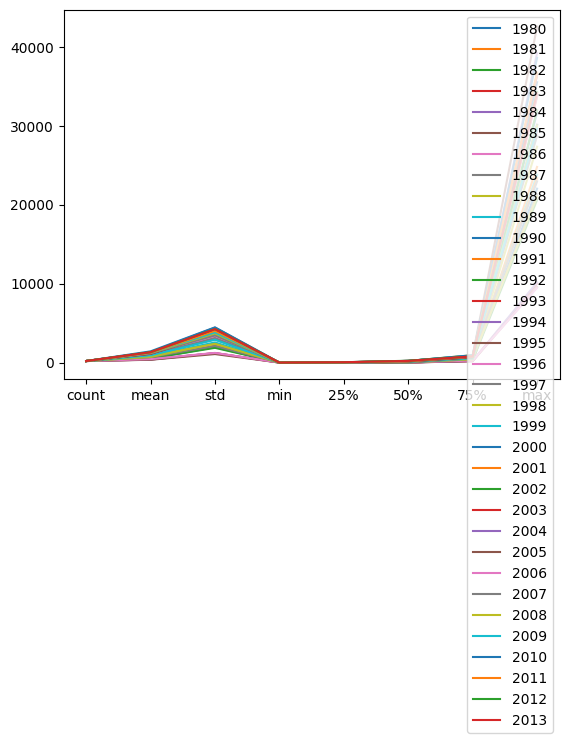

In [ ]:
df_can_sum.plot()

datanya agak terbalik, yang mau kita lihat adalah perubahan dari tahun ke tahun. count nya, mean nya, bukan per tahunnya apa pebandingan count dengan mean, dll.

kalau terbalik seperti ini, kita gunakan "Transpose"

In [ ]:
df_can_sum.T.head()

,count,mean,std,min,25%,50%,75%,max
1980,195.0,508.394872,1949.588546,0.0,0.0,13.0,251.5,22045.0
1981,195.0,566.989744,2152.643752,0.0,0.0,10.0,295.5,24796.0
1982,195.0,534.723077,1866.997511,0.0,0.0,11.0,275.0,20620.0
1983,195.0,387.435897,1204.333597,0.0,0.0,12.0,173.0,10015.0
1984,195.0,376.497436,1198.246371,0.0,0.0,13.0,181.0,10170.0


kalau di transpose, perhatikan judul kolomnya menjadi count, mean, dll. Setiap kolom akan menjadi 1 garis di line plot dengan judul kolom tersebut.

<Axes: >

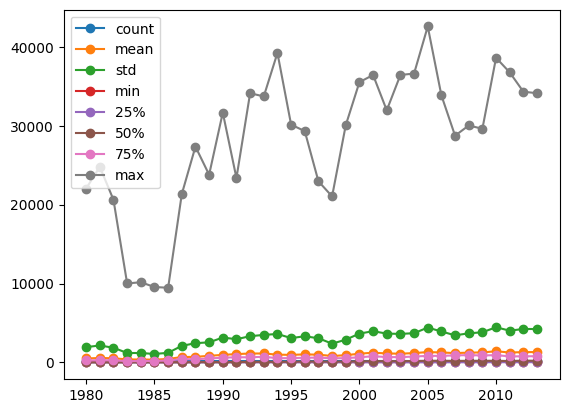

In [ ]:
df_can_sum.T.plot(marker="o")

karena kolom "max" angkanya besar sendiri, garis lain di grafik diatas jadi tidak terlihat. kita bisa buat lagi grafik tanpa kolom "max"

In [ ]:
df_can_sum.T.drop(columns=["max"]).head()

,count,mean,std,min,25%,50%,75%
1980,195.0,508.394872,1949.588546,0.0,0.0,13.0,251.5
1981,195.0,566.989744,2152.643752,0.0,0.0,10.0,295.5
1982,195.0,534.723077,1866.997511,0.0,0.0,11.0,275.0
1983,195.0,387.435897,1204.333597,0.0,0.0,12.0,173.0
1984,195.0,376.497436,1198.246371,0.0,0.0,13.0,181.0


<Axes: >

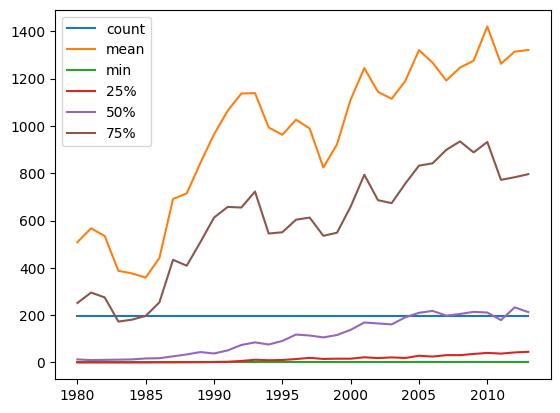

In [ ]:
df_can_sum.T.drop(columns=["max", "std"]).plot()

dari grafik diatas, sepertinya:
- kebanyakan negara mengirim dibawah 200 orang per tahunnya
- semakin lama semakin banyak imigran yang ke Canada setiap tahunnya
- perbedaan bisa jauh antara negara dari yang tidak mengirim imigran ke Canada sama sekali sampai yang mengirim puluhan ribu orang setiap tahunnya
- ada drop di negara yang mengirim puluhan ribu imigran ke Canada di tahun 1983-1986 (kira kira kenapa? bisa kita explore)

## Line Plot
Mari kita gunakan line plot untuk melihat trend jumlah imigran dari Indonesia ke Canada dari tahun ke tahun

1. kita ambil data Indonesia saja
2. buat line plot dengan "Indonesia" sebagai kolom, dan tahun tahun sebagai baris

In [ ]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


kita data cleaning sedikit,
- ganti "OdName" --> "Country"
- ganti "AreaName" --> "Continent"
- ganti "RegName" --> "Region"
- hapus kolom "Type", "Coverage", "AREA" , "REG", "DEV", "DevName"

In [ ]:
df_can2 = df_can.rename(columns={"OdName": "Country", "AreaName":"Continent", "RegName":"Region"})
df_can2.head(1)

,Type,Coverage,Country,AREA,Continent,REG,Region,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004


In [ ]:
df_can3 = df_can2.drop(columns=["Type", "Coverage", "AREA" , "REG", "DEV", "DevName"])
df_can3.head(1)

,Country,Continent,Region,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004


untuk kolom tahun 1980-2013 sepertinya bakal sering kita gunakan, kita siapkan variable untuk 1980-2013

In [ ]:
years = range(1980,2014)
# for y in years:
#   print(y)

perhatikan kalau nama negara "Country" itu unik

In [ ]:
df_can3['Country'].nunique()

195

nama negara yang unik ini boleh kita jadikan index, untuk memudahkan ambil data per negara tertentu.

tanpa index yang menggunakan nama negara, kita akan perlu teknik query untuk mengambil data tertentu

```python
df_can3[df_can3['Country']=="Indonesia"]
```

tapi kalau nama negaranya di index, kita bisa pakai .loc
```python
df_can3.loc["Indonesia"]
```

untuk memudahkan, kita gunakan nama negara sebagai index

In [ ]:
df_can4 = df_can3.set_index("Country")
df_can4.head()

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,132,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,0,...,0,0,1,1,0,0,0,0,1,1


Kembali ke tujuan kita, membuat line plot dengan data imigrasi dari Indonesia

In [ ]:
df_indo = df_can4.loc[["Indonesia"]]
df_indo

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Indonesia,Asia,South-Eastern Asia,186,178,252,115,123,100,127,213,...,552,632,613,657,661,504,712,390,395,387


<Axes: xlabel='Country'>

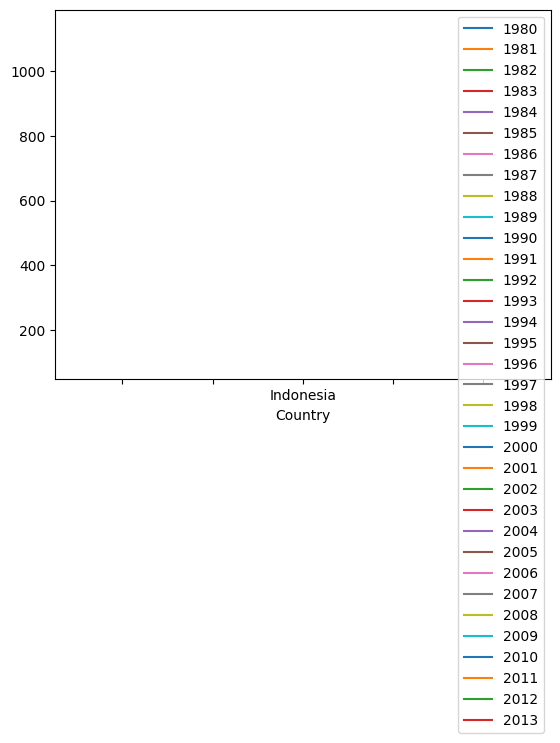

In [ ]:
df_indo.plot()

In [ ]:
df_indo = df_can4.loc[["Indonesia"]]
df_indo = df_indo.T
df_indo.head()

Country,Indonesia
Continent,Asia
Region,South-Eastern Asia
1980,186
1981,178
1982,252


In [ ]:
df_indo.loc[years].head()

Country,Indonesia
1980,186
1981,178
1982,252
1983,115
1984,123


datanya sudah siap, kita bisa plot

<Axes: >

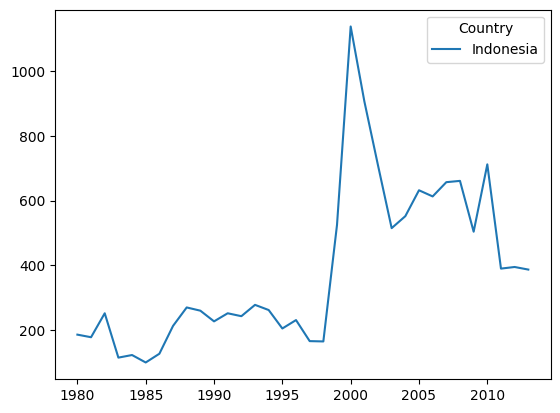

In [ ]:
df_indo.loc[years].plot()

jadilah data imigrasi ke Canada per tahun dari Indonesia. kita tambahkan text dan style untuk mempercantik plot nya

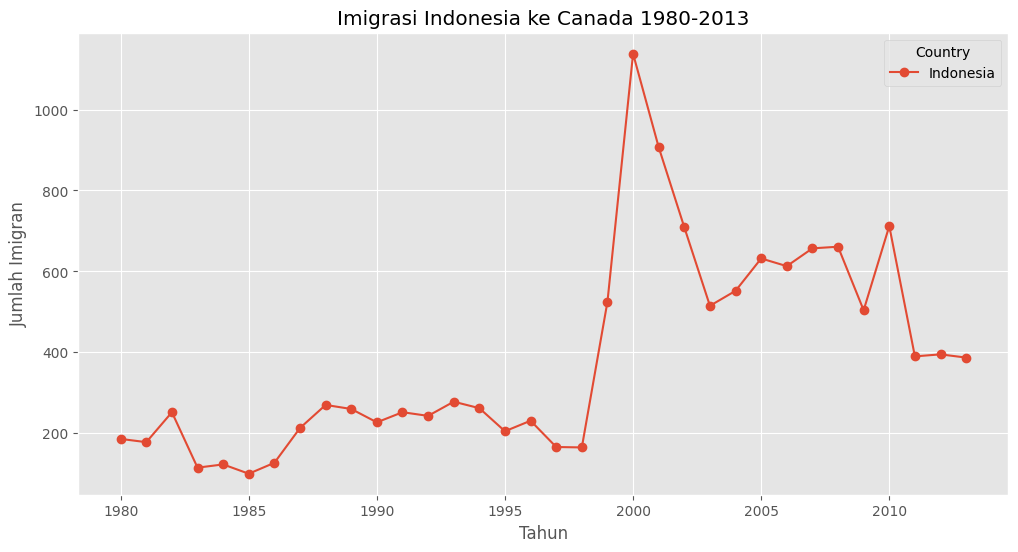

In [ ]:
mpl.style.use("ggplot")

df_indo.loc[years].plot(marker="o",
                        figsize=(12,6))

plt.title("Imigrasi Indonesia ke Canada 1980-2013")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Imigran")
plt.show()

kalau dari grafik nya saja, kita bisa melihat adanya rata-rata jumlah imigran di sekitar 200an. lalu ada kenaikan tiba-tiba, lalu rata-rata stabil di 600an, lalu naik sebentar, dan turun ke 400an.

karena ini adalah data imigrasi, sebenarnya kita bisa memperkirakan apa yang terjadi saat ada lonjakan jumlah imigran. krisis moneter, perang, bencana alam, membuat negara awal tidak aman.

konteks yang kita tambahkan dari hasil research di luar data kita, boleh kita tambahkan ke grafik nya dengan text

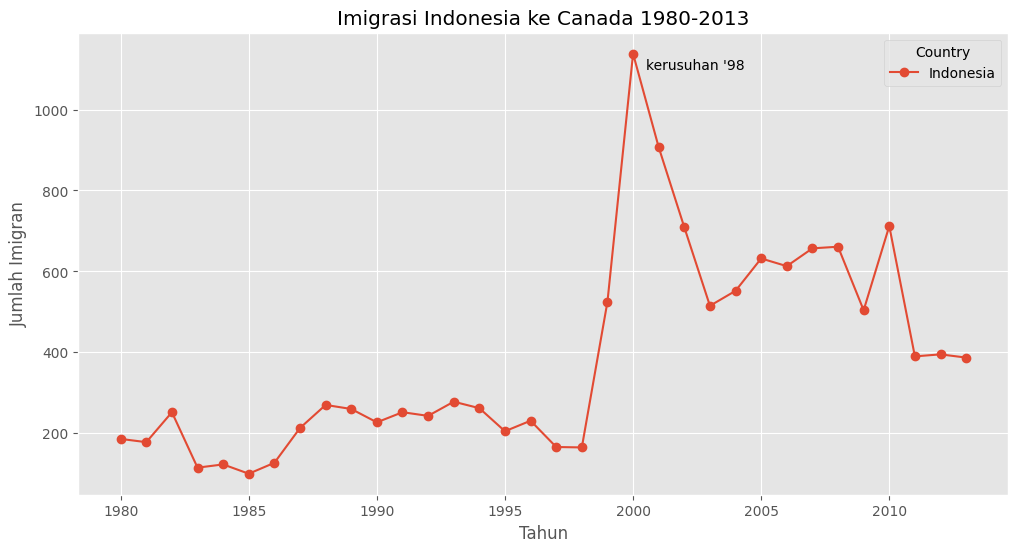

In [ ]:
df_indo.loc[years].plot(marker="o",
                        figsize=(12,6))

plt.title("Imigrasi Indonesia ke Canada 1980-2013")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Imigran")

plt.text(2000.5, 1100, "kerusuhan '98")
plt.show()

selain informasi 1 negara, mungkin ada baiknya kita lihat informasi regional. Misalnya, kita bisa bandingkan jumlah imigran Indonesia dengan Singapore dan Malaysia.

In [ ]:
df_insgmy = df_can4.loc[["Indonesia", "Singapore", "Malaysia"]]
df_insgmy = df_insgmy.T
df_insgmy = df_insgmy.loc[years]
df_insgmy.head()

Country,Indonesia,Singapore,Malaysia
1980,186,241,786
1981,178,301,816
1982,252,337,813
1983,115,169,448
1984,123,128,384


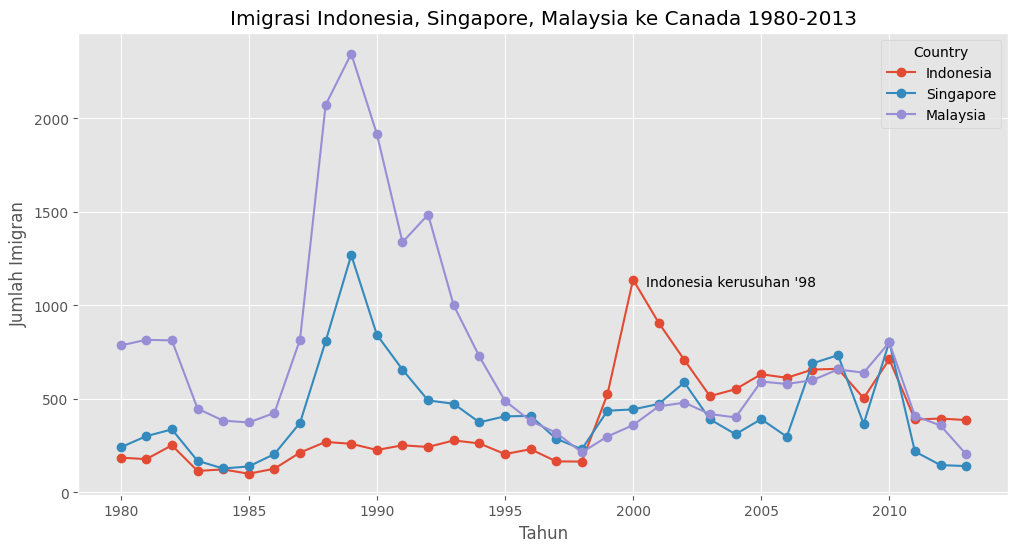

In [ ]:
df_insgmy.plot(marker="o",
               figsize=(12,6))

plt.title("Imigrasi Indonesia, Singapore, Malaysia ke Canada 1980-2013")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Imigran")

plt.text(2000.5, 1100, "Indonesia kerusuhan '98")
plt.show()

dari line plot diatas kita bisa lihat adanya tren naik di Singapore dan Malaysia, dengan puncaknya di tahun 1988. Jumlah Imigran Indonesia tidak punya perubahan di tahun tahun ini.

sementara Indonesia ada di 2000, dan kedua negara lainnya tidak punya perubahan di tahun tahun ini.

## latihan pendek
1. import dataset, boleh gunakan contoh dataset Imigrasi Canada di atas
2. pilih 1 negara, buat line plot jumlah imigran 1980-2013
3. pilih lebih dari 1 negara, buat line plot
4. pilih lebih dari 1 negara, dan pilih juga tahun 1981-1991 saja, buat line plot
5. boleh coba tuliskan insight dari grafik yang sudah dibuat

kita bahas di jam 20.20 WIB

In [ ]:
## kerjakan latihan pendek
## import file excel sheet tertentu
df_can = pd.read_excel("https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true",
                       sheet_name="Canada by Citizenship",
                       skiprows=20,
                       skipfooter=2
                       )
# remove data yang tidak kita gunakan, seperti 20 rows pertama dan 2 rows terakhir
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [ ]:
df_can.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [ ]:
# rename columns dan
# remove juga beberapa kolom yang tidak kita pakai
df_can2 = df_can.rename(columns={"OdName":"Country"})
df_can2 = df_can2.drop(columns=['Type', 'Coverage', 'AREA', 'AreaName', 'REG','RegName', 'DEV', 'DevName'])
df_can2.head(3)

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,16,39,39,47,71,340,496,741,828,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,1,0,0,0,0,0,1,2,2,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,80,67,71,69,63,44,69,132,242,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331


In [ ]:
# set kolom Country menjadi index
df_can2 = df_can2.set_index("Country")
df_can2.head(2)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,1,0,0,0,0,0,1,2,2,3,...,1450,1223,856,702,560,716,561,539,620,603


In [ ]:
df_can2.index

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       ...
       'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Western Sahara',
       'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country', length=195)

In [ ]:
# pilih beberapa negara untuk beberapa tahun lalu dibuat line plot
df_2n = df_can2.loc[["Argentina", "United States of America"]]
df_2n = df_2n.T

# ambil tahun tertentu, misalnya 1981-1991
df_2n_sy = df_2n.loc[range(1981,1992)]
df_2n_sy

Country,Argentina,United States of America
1981,426,10030
1982,626,9074
1983,241,7100
1984,237,6661
1985,196,6543
1986,213,7074
1987,519,7705
1988,374,6469
1989,538,6790
1990,678,5892


In [ ]:
df_2n_sy.index

Index([1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991], dtype='object')

untuk tipe data index numerik, atau judul kolom numerik, kita bisa pakai range tanpa harus di convert

In [ ]:
df_2n_sy.columns

Index(['Argentina', 'United States of America'], dtype='object', name='Country')

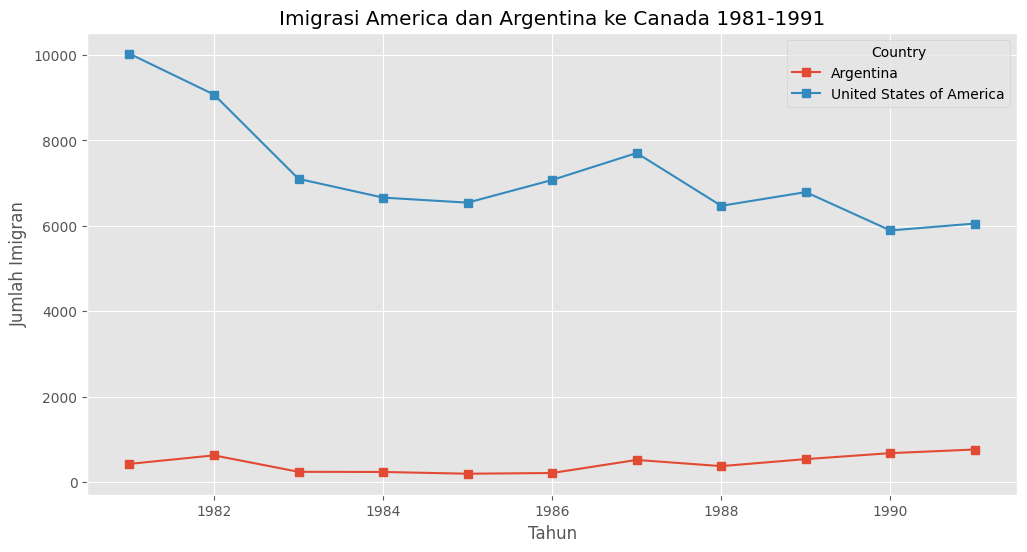

In [ ]:
# bikin line plot
df_2n_sy.plot(marker="s",
               figsize=(12,6))

plt.title("Imigrasi America dan Argentina ke Canada 1981-1991")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Imigran")

plt.show()

note: marker ada bentuk lain selain bulat dan kotak bisa dilihat di https://matplotlib.org/stable/api/markers_api.html

untuk grafik diatas, kita bisa lihat jumlah imgiran America selalu konsisten lebih banyak daripada Argentina. tapi trend jumlah imigran America menurun dari dulunya 10rban ke 6rban.

### membuat label di setiap marker dengan value y-axis nya
kita gunakan contoh untuk data imigrasi America

In [ ]:
df_2n_sy.head()

Country,Argentina,United States of America
1981,426,10030
1982,626,9074
1983,241,7100
1984,237,6661
1985,196,6543


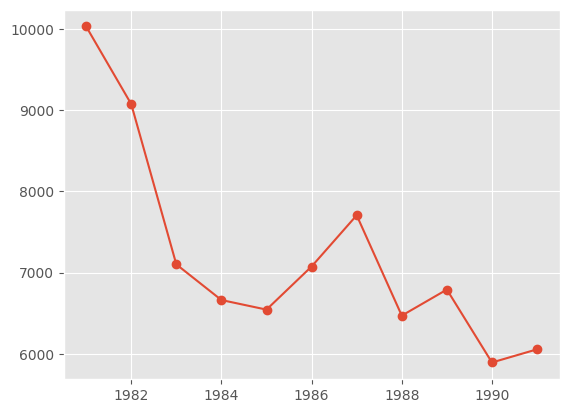

In [ ]:
plt.plot(df_2n_sy.index, df_2n_sy['United States of America'], marker='o')

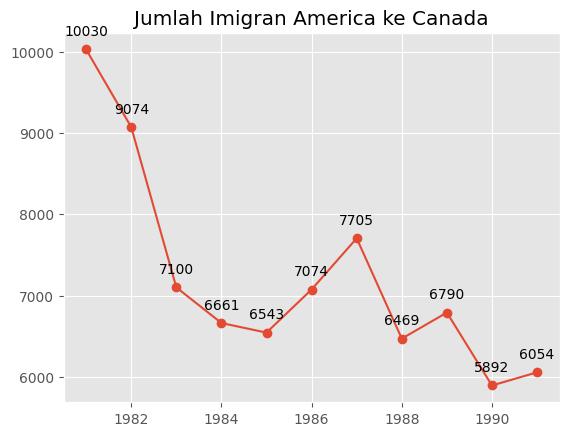

In [ ]:
# untuk setiap titik, tambahkan label
plt.plot(df_2n_sy.index, df_2n_sy['United States of America'], marker='o')

for i, txt in enumerate(df_2n_sy['United States of America']):
  plt.annotate(txt,
               (df_2n_sy.reset_index()['index'].iloc[i], df_2n_sy['United States of America'].iloc[i]),
               textcoords="offset points",
               xytext=(0,10),
               ha="center"
              )

plt.title("Jumlah Imigran America ke Canada")
plt.show()

In [ ]:
# bagaimana kalau ada lebih dari 1 kolom data, misalnya Indonesia dan Singapore
# kita buatkan function untuk plot dan annotate, dan kita gunakan dua kali

def plot_and_annotate(df, column, color):
  plt.plot(df.index,
           df[column],
           marker="o",
           label=column,
           color=color,
           )

  for i, txt in enumerate(df[column]):
    plt.annotate(txt,
                (df.reset_index()['index'].iloc[i], df[column].iloc[i]),
                textcoords="offset points",
                xytext=(0,10),
                ha="center",
                color=color,
                )

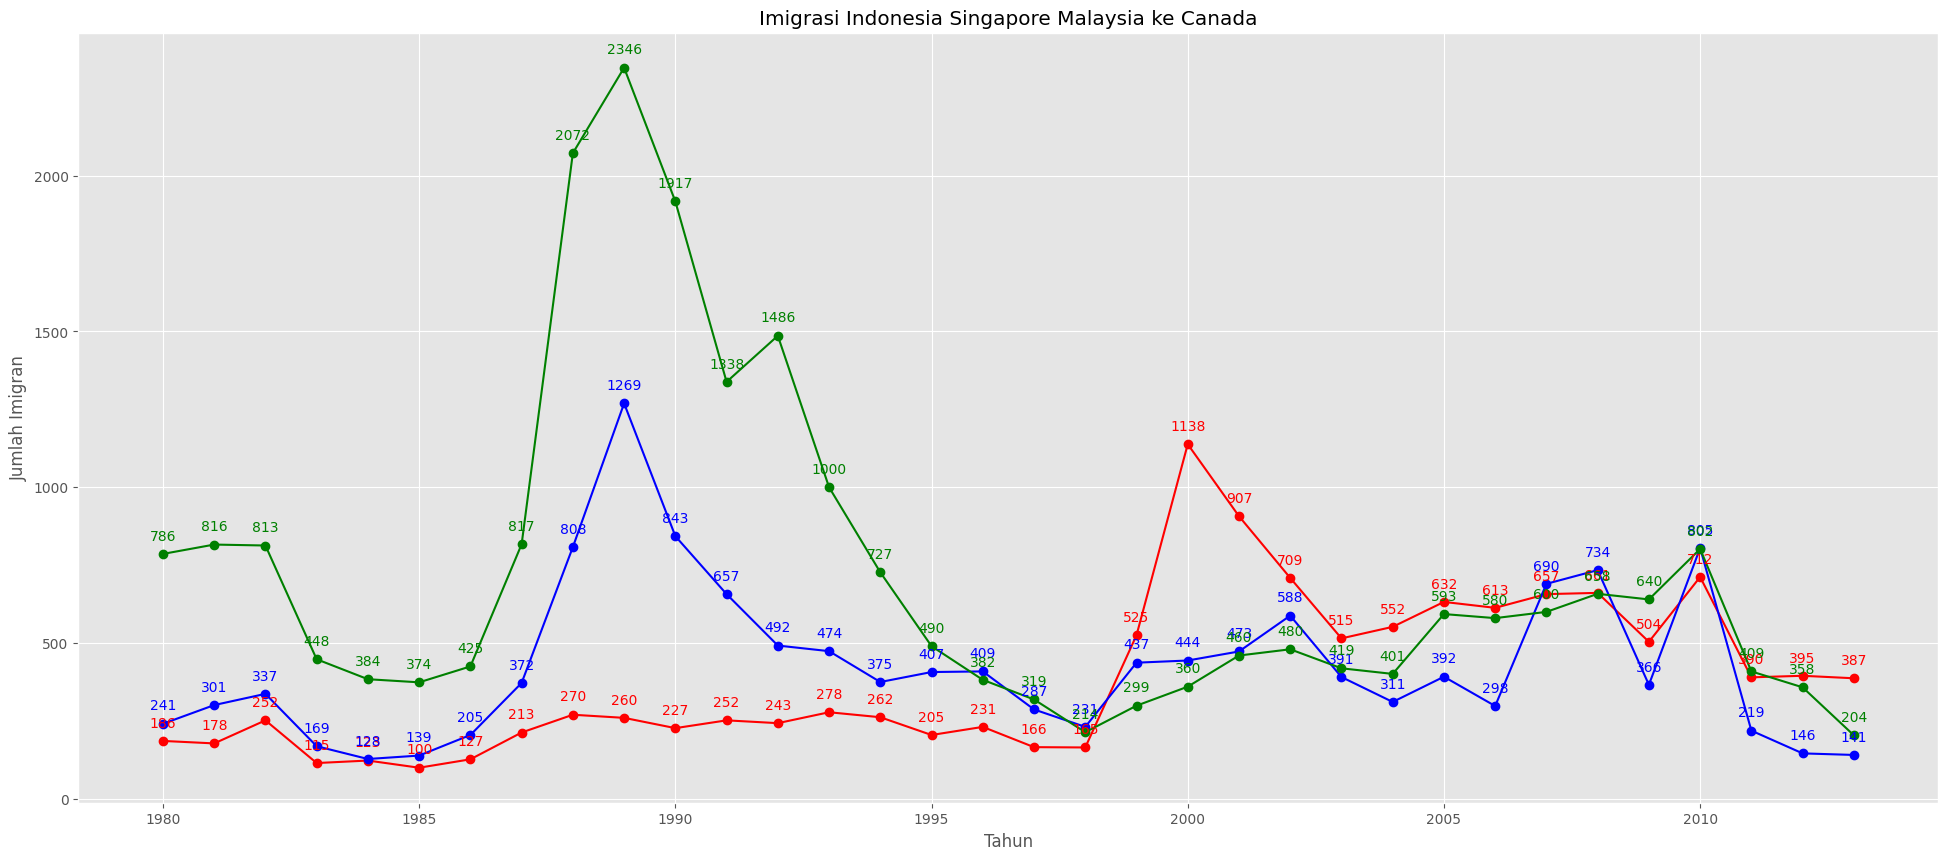

In [ ]:
plt.figure(figsize=(24,10))

plot_and_annotate(df_insgmy, 'Indonesia', 'red')
plot_and_annotate(df_insgmy, 'Singapore', 'blue')
plot_and_annotate(df_insgmy, 'Malaysia', 'green')

plt.title("Imigrasi Indonesia Singapore Malaysia ke Canada")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Imigran")
plt.show()

kalau mau ambil data per region

In [ ]:
df_can4[df_can4['Region'] == "Southern Asia"]

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Bangladesh,Asia,Southern Asia,83,84,86,81,98,92,486,503,...,2660,4171,4014,2897,2939,2104,4721,2694,2640,3789
Bhutan,Asia,Southern Asia,0,0,0,0,1,0,0,0,...,1,5,10,7,36,865,1464,1879,1075,487
India,Asia,Southern Asia,8880,8670,8147,7338,5704,4211,7150,10189,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
Iran (Islamic Republic of),Asia,Southern Asia,1172,1429,1822,1592,1977,1648,1794,2989,...,6348,5837,7480,6974,6475,6580,7477,7479,7534,11291
Maldives,Asia,Southern Asia,0,0,0,1,0,0,0,0,...,1,0,0,2,1,7,4,3,1,1
Nepal,Asia,Southern Asia,1,1,6,1,2,4,13,6,...,404,607,540,511,581,561,1392,1129,1185,1308
Pakistan,Asia,Southern Asia,978,972,1201,900,668,514,691,1072,...,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603
Sri Lanka,Asia,Southern Asia,185,371,290,197,1086,845,1838,4447,...,4495,4930,4714,4123,4756,4547,4422,3309,3338,2394


In [ ]:
df_can4.index

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       ...
       'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Western Sahara',
       'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country', length=195)

# Bar Chart

mirip line chart tapi bentuknya bar

pros: membuat skala datanya terlihat

terkadang kalau kita pakai line chart, kita tidak sadar perubahan data per titik sebenarnya kecil dibandingkan skala datanya.

<Axes: >

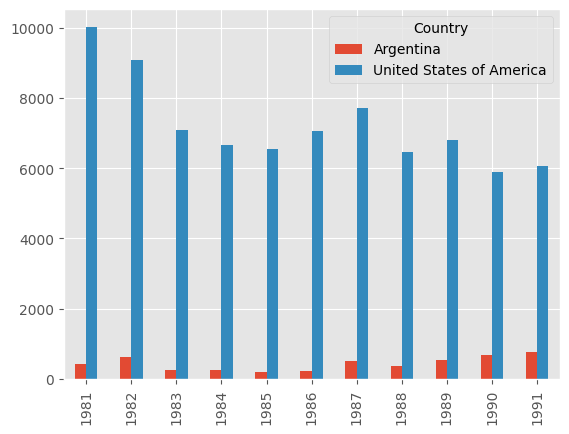

In [ ]:
df_2n_sy.plot(kind="bar")

<Axes: >

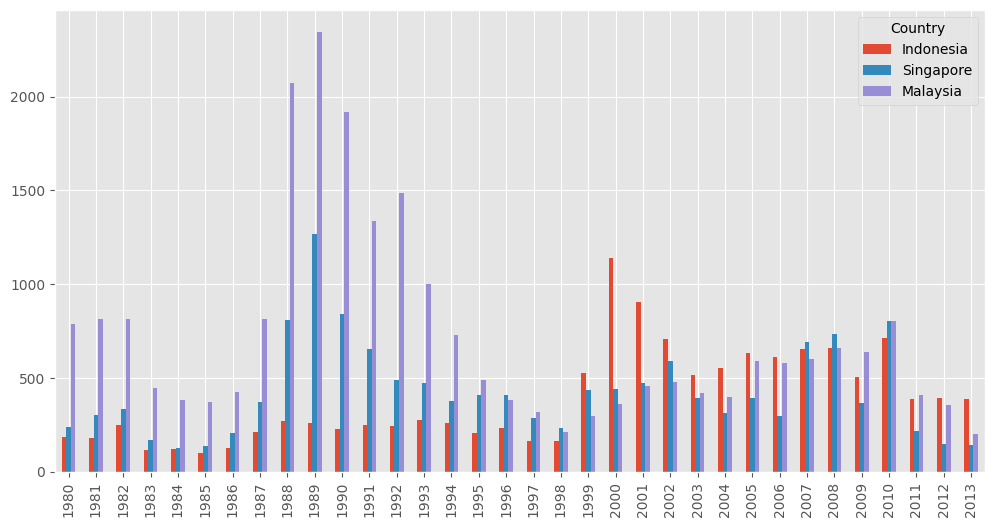

In [ ]:
df_insgmy.plot(kind="bar", figsize=(12,6))

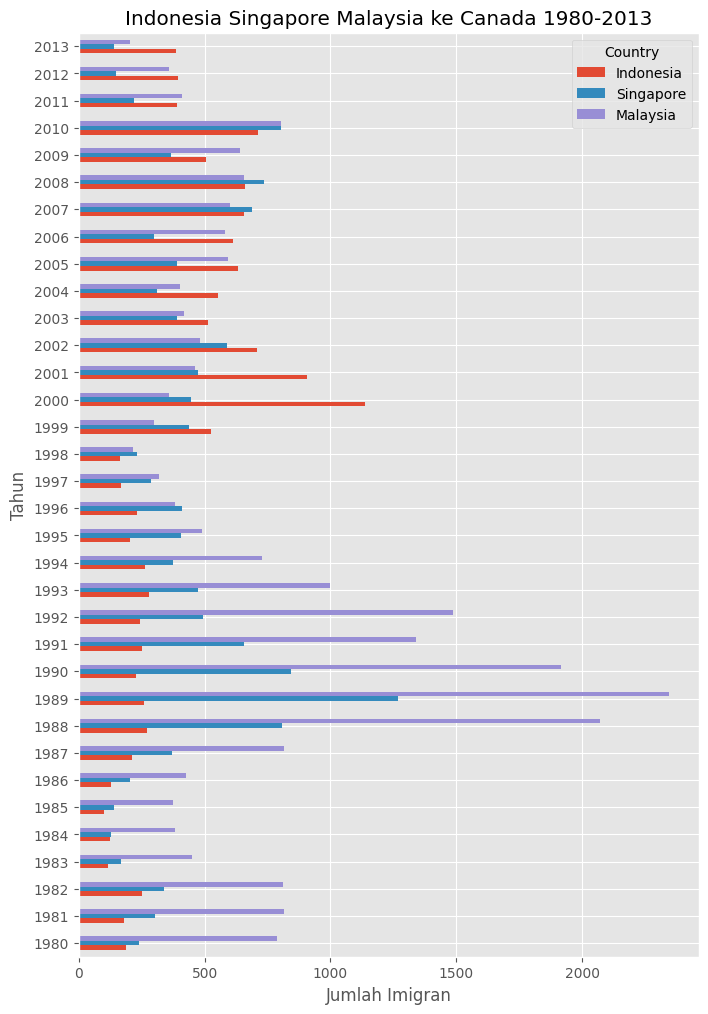

In [ ]:
df_insgmy.plot(kind="barh", figsize=(8,12))

plt.title("Indonesia Singapore Malaysia ke Canada 1980-2013")
plt.ylabel("Tahun")
plt.xlabel("Jumlah Imigran")
plt.show()

## Area Plot
- stacked
- not stacked

stacked: cumulative, di totalkan

not stacked: mirip line plot cuma di arsir bawahnya

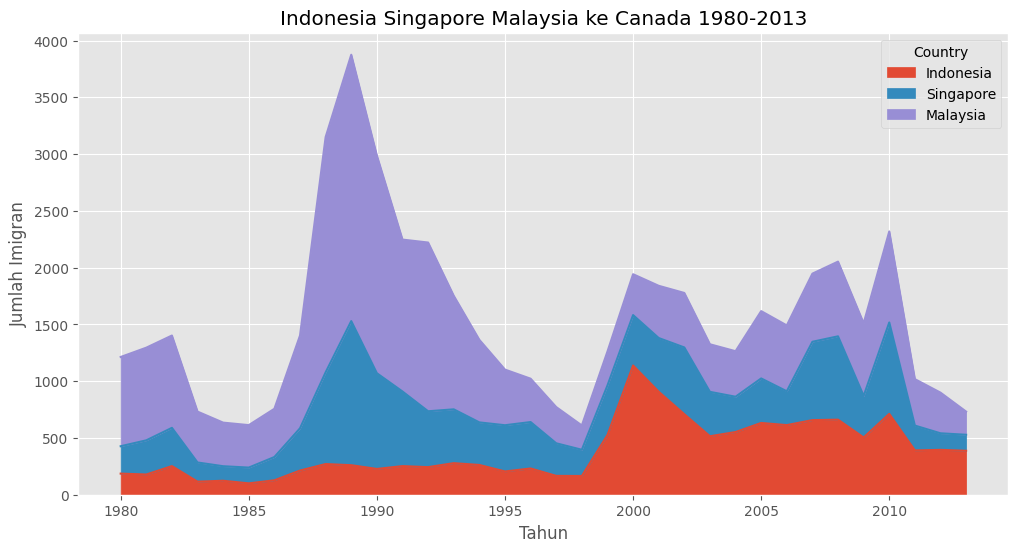

In [ ]:
df_insgmy.plot(kind="area", figsize=(12, 6))

plt.title("Indonesia Singapore Malaysia ke Canada 1980-2013")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Imigran")
plt.show()

secara default, area plot akan melakukan versi "stacked" dimana semua value di totalkan baru di gambar. Bisa dilihat trend gabungan total 3 negara diatas, paling banyak jumlah imigran di tahun

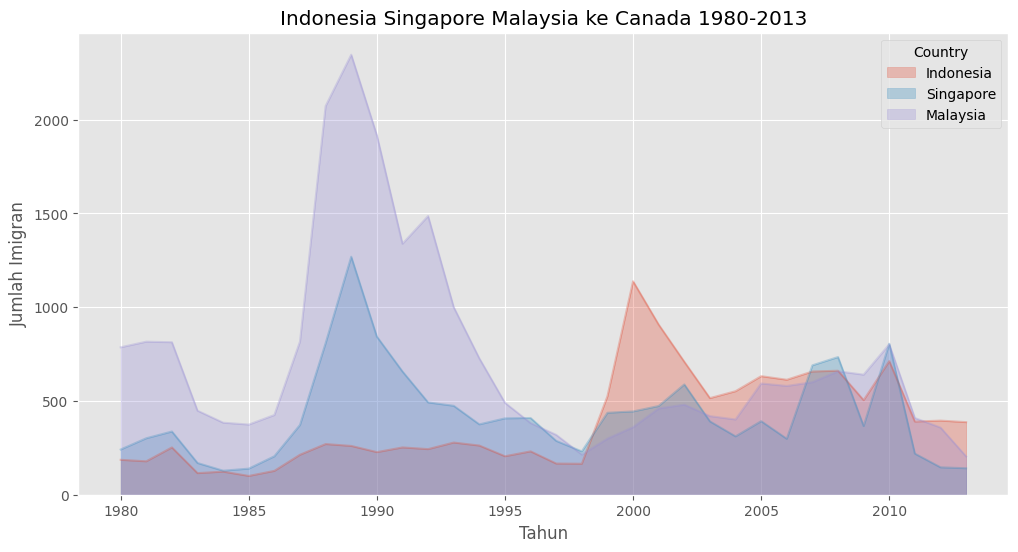

In [ ]:
df_insgmy.plot(kind="area",
               figsize=(12, 6),
               alpha=0.3,
               stacked=False)

plt.title("Indonesia Singapore Malaysia ke Canada 1980-2013")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Imigran")
plt.show()

## Pie Chart

berbeda dengan line bar dan area plot, dimana mereka fokus ke perbandingan dan trend, pie chart lebih kecil skalanya.

pie chart fokus ke perbandingan beberapa titik data.

kalau line bar dan area bisa membandingkan 3 set data, pie chart tidak bisa.

pie chart bandingin 3 data aja, bukan 3 set.

di rekomen max 8 data aja.

Misalnya, kita mau bandingkan jumlah imigran di tahun 1983 dan 1993 --> 2 titik data, bisa.

Kita bisa coba beberapa pie chart:
- jumlah imigran 1983 vs 1993
- jumlah imigran Indonesia, Singapore, Malaysia di tahun 1989
- jumlah imigran Indonesia, Singapore, Malaysia di tahun 2010
- jumlah imigran dari Asia Eropa dan benua lainnya
- jumlah imigran total 1980-2013 per negara ASEAN


In [ ]:
# jumlah imigran 1983 vs 1993
df_8393 = df_can4[[1983,1993]]
df_8393.head() # masih per negara

,1983,1993
Country,,
Afghanistan,47,713
Albania,0,96
Algeria,69,717
American Samoa,0,0
Andorra,0,0


In [ ]:
# kita hitung total nya saja
df_8393_sum = df_8393.sum()
df_8393_sum

1983     75550
1993    222049
dtype: int64

<Axes: >

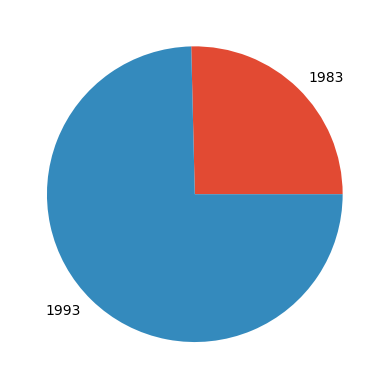

In [ ]:
df_8393_sum.plot(kind="pie")

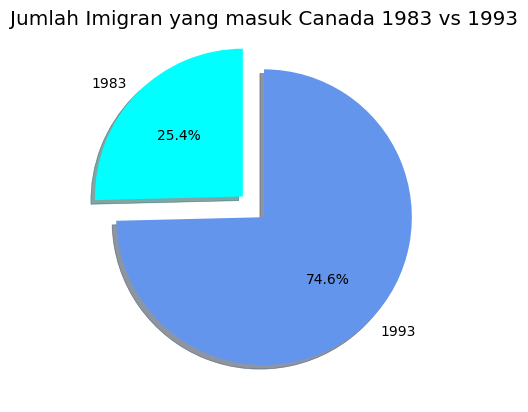

In [ ]:
df_8393_sum.plot(kind="pie",
                 autopct='%1.1f%%', # add in percentages
                 startangle=90,     # start angle
                 shadow=True,       # add shadow
                 colors=["cyan", "cornflowerblue"],
                 explode=[0.2, 0]
                )

plt.title("Jumlah Imigran yang masuk Canada 1983 vs 1993")
plt.show()

In [ ]:
# jumlah imigran Indonesia, Singapore, Malaysia di tahun 1989
df_insgmy.loc[1989]

Country
Indonesia     260
Singapore    1269
Malaysia     2346
Name: 1989, dtype: object

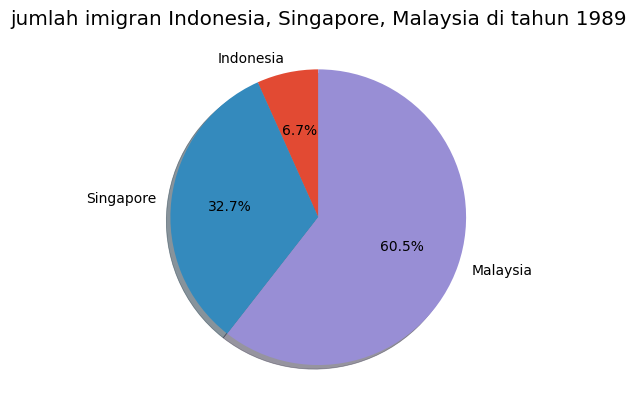

In [ ]:
df_insgmy.loc[1989].plot(kind="pie",
                 autopct='%1.1f%%', # add in percentages
                 startangle=90,     # start angle
                 shadow=True,       # add shadow
                )

plt.title("jumlah imigran Indonesia, Singapore, Malaysia di tahun 1989")
plt.ylabel("")
plt.show()

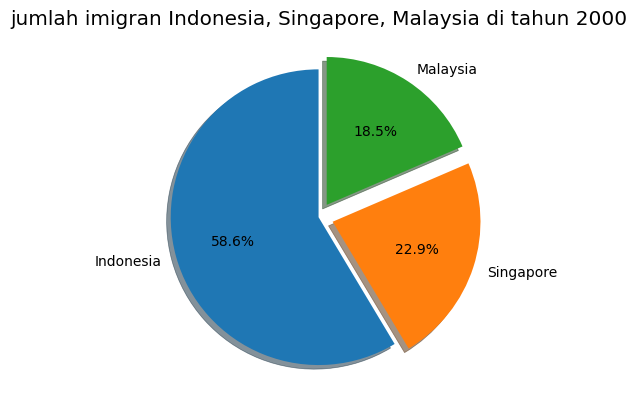

In [ ]:
df_insgmy.loc[2000].plot(kind="pie",
                 autopct='%1.1f%%', # add in percentages
                 startangle=90,     # start angle
                 shadow=True,       # add shadow
                 colors=["tab:blue", "tab:orange", "tab:green"],
                 explode=[0, 0.1, 0.1]
                )

plt.title("jumlah imigran Indonesia, Singapore, Malaysia di tahun 2000")
plt.ylabel("")
plt.show()

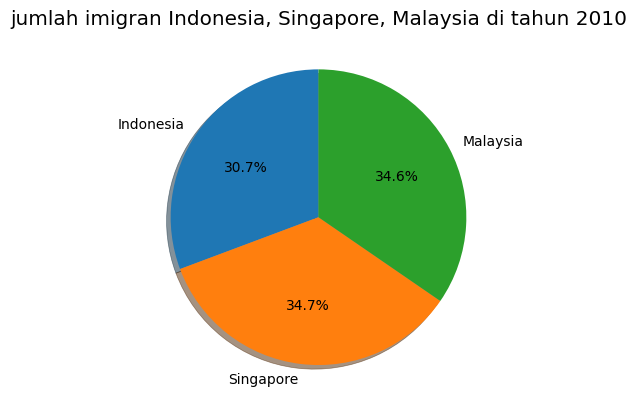

In [ ]:
# jumlah imigran Indonesia, Singapore, Malaysia di tahun 2010
df_insgmy.loc[2010].plot(kind="pie",
                 autopct='%1.1f%%', # add in percentages
                 startangle=90,     # start angle
                 shadow=True,       # add shadow
                 colors=["tab:blue", "tab:orange", "tab:green"]
                )

plt.title("jumlah imigran Indonesia, Singapore, Malaysia di tahun 2010")
plt.ylabel("")
plt.show()

In [ ]:
# jumlah imigran dari Asia Eropa dan benua lainnya

# groupby per bedua
# aggregation sum
df_can4.head()

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,132,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,0,...,0,0,1,1,0,0,0,0,1,1


kita perlu hitung dulu total semua tahun, bukan tahun tahun sendiri sendiri

In [ ]:
df_can4.sum(axis=1)

<ipython-input-136-35818a6410f5>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can4.sum(axis=1)


Country
Afghanistan       58639
Albania           15699
Algeria           69439
American Samoa        6
Andorra              15
                  ...  
Viet Nam          97146
Western Sahara        2
Yemen              2985
Zambia             1677
Zimbabwe           8598
Length: 195, dtype: int64

karena sum memberikan data 1 dimensi, kita masukkan ke 1 kolom. kolom Total

In [ ]:
df_can5 = df_can4.copy()
df_can5["Total"] = df_can4.sum(axis=1)

df_can5.head()

<ipython-input-137-e1e1653c5c0c>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can5["Total"] = df_can4.sum(axis=1)


,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,132,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,0,...,0,1,1,0,0,0,0,1,1,15


In [ ]:
# kita tidak perlu kolom lainnya selain Continent dan Total
df_benua = df_can5[["Continent", "Total"]]
df_benua

,Continent,Total
Country,,
Afghanistan,Asia,58639
Albania,Europe,15699
Algeria,Africa,69439
American Samoa,Oceania,6
Andorra,Europe,15
...,...,...
Viet Nam,Asia,97146
Western Sahara,Africa,2
Yemen,Asia,2985


In [ ]:
# cari total per continent
df_benua2 = df_benua.groupby("Continent").sum()
df_benua2

,Total
Continent,
Africa,618948
Asia,3317794
Europe,1410947
Latin America and the Caribbean,765148
Northern America,241142
Oceania,55174


In [ ]:
df_benua3 = df_benua2.squeeze()
df_benua3

Continent
Africa                              618948
Asia                               3317794
Europe                             1410947
Latin America and the Caribbean     765148
Northern America                    241142
Oceania                              55174
Name: Total, dtype: int64

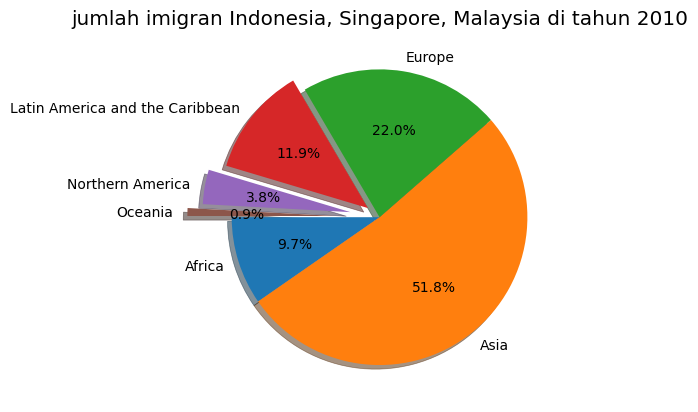

In [ ]:
df_benua3.plot(kind="pie",
                 autopct='%1.1f%%', # add in percentages
                 startangle=180,     # start angle
                 shadow=True,       # add shadow
                 colors=["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown"],
                 explode=[0,0,0,0.1,0.2,0.3]
                )

plt.title("jumlah imigran Indonesia, Singapore, Malaysia di tahun 2010")
plt.ylabel("")
plt.show()

## latihan pendek
gunakan dataframe diatas untuk mencari dan membuat pie chart yang:
- jumlah imigran total 1980-2013 per negara ASEAN

tips:
- filter negara ASEAN saja
- total dulu jumlah imigran 1980-2013 per negara
- buat pie chart

In [ ]:
# jumlah imigran total 1980-2013 per negara ASEAN
df_can4.head()

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,132,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,0,...,0,0,1,1,0,0,0,0,1,1


In [ ]:
df_can4['Region'].unique() # cek ada region apa saja

array(['Southern Asia', 'Southern Europe', 'Northern Africa', 'Polynesia',
       'Middle Africa', 'Caribbean', 'South America', 'Western Asia',
       'Australia and New Zealand', 'Western Europe', 'Eastern Europe',
       'Central America', 'Western Africa', 'Southern Africa',
       'South-Eastern Asia', 'Eastern Africa', 'Northern America',
       'Eastern Asia', 'Northern Europe', 'Melanesia', 'Central Asia',
       'Micronesia'], dtype=object)

In [ ]:
# ambil ASEAN aja
df_asean = df_can4[df_can4['Region'] == 'South-Eastern Asia']
df_asean

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Brunei Darussalam,Asia,South-Eastern Asia,79,6,8,2,2,4,12,16,...,3,4,5,11,10,5,12,6,3,6
Cambodia,Asia,South-Eastern Asia,12,19,26,33,10,7,8,14,...,348,370,529,460,354,203,200,196,233,288
Indonesia,Asia,South-Eastern Asia,186,178,252,115,123,100,127,213,...,552,632,613,657,661,504,712,390,395,387
Lao People's Democratic Republic,Asia,South-Eastern Asia,11,6,16,16,7,17,21,20,...,38,42,74,53,32,39,54,22,25,15
Malaysia,Asia,South-Eastern Asia,786,816,813,448,384,374,425,817,...,401,593,580,600,658,640,802,409,358,204
Myanmar,Asia,South-Eastern Asia,80,62,46,31,41,23,18,33,...,191,210,953,1887,975,1153,556,368,193,262
Philippines,Asia,South-Eastern Asia,6051,5921,5249,4562,3801,3150,4166,7360,...,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544
Singapore,Asia,South-Eastern Asia,241,301,337,169,128,139,205,372,...,311,392,298,690,734,366,805,219,146,141
Thailand,Asia,South-Eastern Asia,56,53,113,65,82,66,78,117,...,392,575,500,487,519,512,499,396,296,400


In [ ]:
# kita simpan kolom years saja
df_asean = df_asean[years]
df_asean.head(3)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Brunei Darussalam,79,6,8,2,2,4,12,16,103,63,...,3,4,5,11,10,5,12,6,3,6
Cambodia,12,19,26,33,10,7,8,14,15,27,...,348,370,529,460,354,203,200,196,233,288
Indonesia,186,178,252,115,123,100,127,213,270,260,...,552,632,613,657,661,504,712,390,395,387


In [ ]:
# totalin 1980-2013
# karena udah sendiri sendiri per negara kita tidak perlu groupby lagi
df_asean_sum = df_asean.sum(axis=1)
df_asean_sum

Country
Brunei Darussalam                      600
Cambodia                              6538
Indonesia                            13150
Lao People's Democratic Republic      1089
Malaysia                             24417
Myanmar                               9245
Philippines                         511391
Singapore                            14579
Thailand                              9174
Viet Nam                             97146
dtype: int64

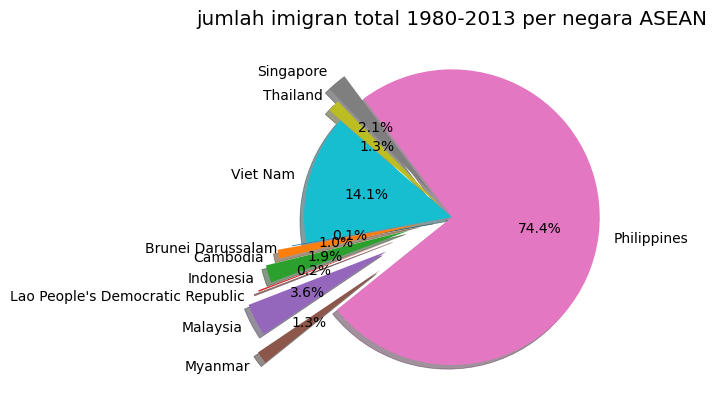

In [ ]:
df_asean_sum.plot(kind="pie",
                 autopct='%1.1f%%', # add in percentages
                 startangle=190,     # start angle
                 shadow=True,       # add shadow
                 colors=["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan"],
                 explode=[0.1,0.2,0.3,0.4,0.5,0.6,0,0.2,0.1,0]
                )

plt.title("jumlah imigran total 1980-2013 per negara ASEAN")
plt.ylabel("")
plt.show()

## Histogram, Box Plot, Scatter Plot
ketiga plot ini bersifat statistik jadi akan lebih mudah dimengerti setelah selesai kelas sesi 9 - descriptive statistics dan sesi 10 - inferential statistics.

Untuk sekarang kita cukup pahami beberapa core concept nya:
- Scatter Plot - melihat korelasi/ hubungan antara 2 set data   
  contoh: apakah orang yang semakin gendut, berat badan tinggi, artinya semakin tinggi? apakah ada korelasi antara berat dan tinggi badan?   
  kita bisa buat scatter plot dimana x-axis adalah berat badan dan y-axis adalah tinggi badan untuk melihat secara visual apakah ada korelasinya

- Box Plot - melihat 5 angka descriptive statistics sekaligus dalam bentuk grafik.   
  contoh: hasil describe kita di awal, bisa kita langsung compare antara tahun ke tahun pakai box plot. box plot menunjukkan  angka 25%, 50%, 75%, lalu "min" dan "max" yang tidak terlalu jauh dari 25% dan 75% nya. kalau terlalu jauh datanya dianggap "aneh" dan dijadikan "outlier" bulat bulat

- Histogram - melihat frekuensi per bin. count per range. misalkan kita punya kelas berisi 100 murid. ada berapa murid yang nilainya 0-10? 10-20? 20-30? 30-40?... 90-100? jumlah bin di contoh ini ada 10. Masing masing bin menjadi sebuah bar


# Scatter Plot
melihat apakah 2 set data punya hubungan

In [ ]:
# apakah ada hubungan antara jumlah imigran Indonesia dan Singapore?

df_insgmy.head()

Country,Indonesia,Singapore,Malaysia
1980,186,241,786
1981,178,301,816
1982,252,337,813
1983,115,169,448
1984,123,128,384


<Axes: xlabel='Indonesia', ylabel='Singapore'>

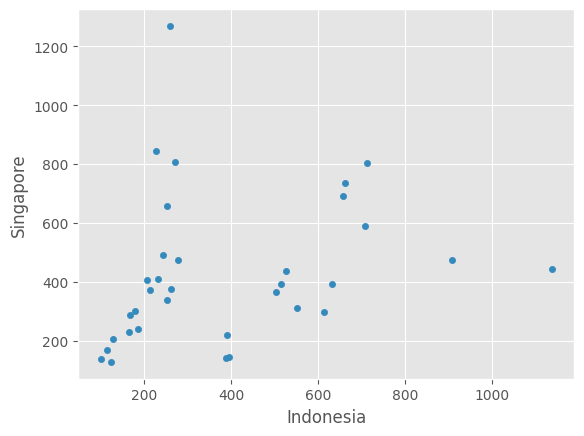

In [ ]:
df_insgmy.plot(kind="scatter", x="Indonesia", y="Singapore")

In [ ]:
df_insgmy.loc[2000]

Country
Indonesia    1138
Singapore     444
Malaysia      360
Name: 2000, dtype: object

bisa kita lihat kalau tahun tahun nya hilang, tidak penting lagi. kita hanya membandingkan setiap jumlah imigran Indonesia dan Singapore ada di baris yang sama, kita plot menjadi 1 titik.

Misalkan, di tahun 2000, jumlah imigran Indonesia di 1138, Singapore di 444, maka kita buat 1 titik data: 1138, 444

di scatter plot diatas kita tidak yakin apakah ada hubungan antara jumlah imigran Indonesia dan Singapore. Sepertinya ada, sedikit positif (ke arah kanan atas) tapi tidak terlalu jelas atau tajam, jadi hanya sedikit saja.

<Axes: xlabel='Malaysia', ylabel='Singapore'>

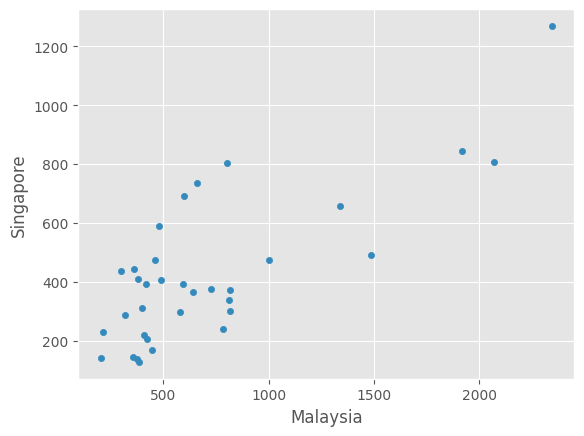

In [ ]:
df_insgmy.plot(kind="scatter", x="Malaysia", y="Singapore")

plot diatas jauh lebih jelas korelasi positif nya. semua titk ada di bagian dari bawah kiri ke atas kanan, menunjukkan korelasi positif.

korelasi positif: kalau Malaysia bertambah jumlah imigran, Singapore juga. sama sama naik

korelasi negatif: kalau Malaysia bertamabah, Singapore berkurang. satu naik, satu turun. arah dari atas kiri ke bawah kanan.

korelasi netral: kedua set data ini tidak ada hubungannya. titik berada di empat sisi.

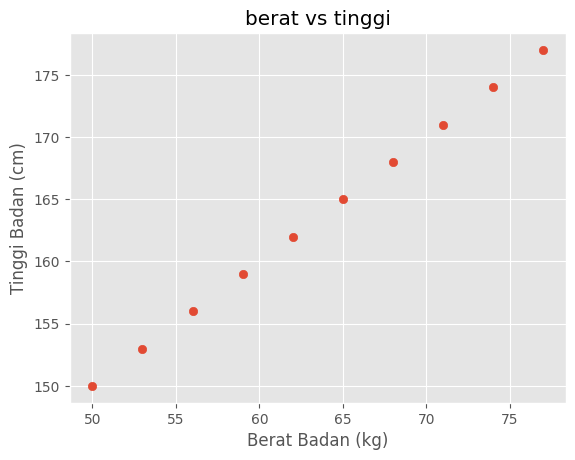

In [ ]:
# gunakan contoh diatas
# ada berat badan
# ada tinggi badan
# apakah ada hubunganya?

berat_badan = np.arange(50,80,3)
tinggi_badan = np.arange(150,180,3)
# tinggi_badan = np.round(np.random.random(10) * 30 + 150, 0)

plt.scatter(berat_badan, tinggi_badan)
plt.xlabel("Berat Badan (kg)")
plt.ylabel("Tinggi Badan (cm)")

plt.title("berat vs tinggi")
plt.show()

# Box Plot
mirip seperti pakai describe lalu kita plot

box plot bisa membandingkan titik titik 25% 50% 75% dari keselurahn data dengan 1 box.

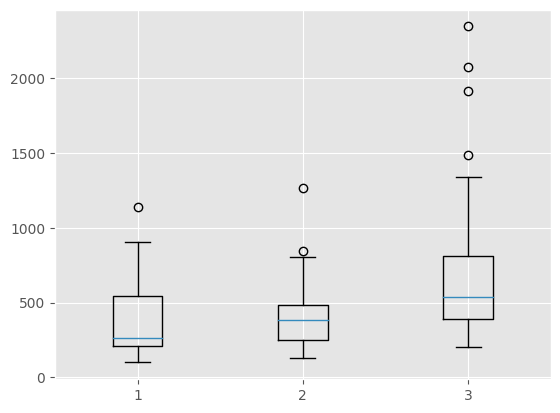

In [ ]:
plt.boxplot(df_insgmy)
plt.show()

In [ ]:
df_insgmy = df_insgmy.astype(int)
df_insgmy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 1980 to 2013
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Indonesia  34 non-null     int64
 1   Singapore  34 non-null     int64
 2   Malaysia   34 non-null     int64
dtypes: int64(3)
memory usage: 2.1+ KB


<Axes: >

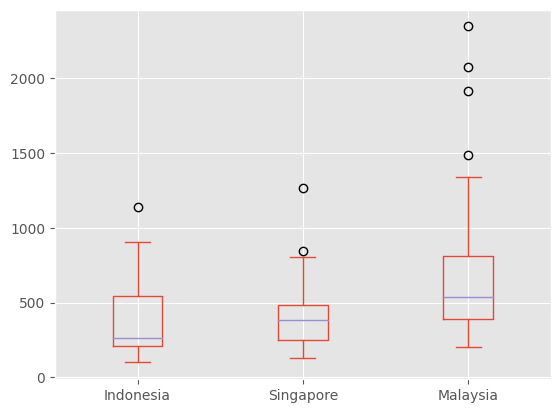

In [ ]:
df_insgmy.plot(kind="box")

jumlah imigran Indonesia biasanya lebih sedikit, tapi karena tidak terlalu konsisten (box lebih panjang) maka tidak aneh juga kalau jumlah imigran lebih banyak dari Singapore.

Singapore box nya kecil, konsisten di sekitar segituan jumlah imigran per tahunnya.

Malaysia biasa paling banyak diantara ketiga negara ini. Dan tidak terlalu konsisten.

Boxplot dengan cepat membandingkan biasanya value2 untuk setiap set data, ada dimana. Kita bisa bandingkan dengan set data lainnya.

In [ ]:
## di kelas berikut kita akan bahas histogram